<a href="https://colab.research.google.com/github/Osman-Dawood/Assinment-2/blob/main/Assinment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means clustering with the California Housing dataset

## Data Preparation
First, load and prepare the dataset, focusing on the longitude, latitude, and median_income columns, which will be used for clustering.

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
housing_data = fetch_california_housing(as_frame=True).frame

# Select the columns for clustering
data = housing_data[['Longitude', 'Latitude', 'MedInc']]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


## Applying K-Means Clustering
Apply K-Means clustering and experiment with different values of k (number of clusters).

In [6]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans for different values of k
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    sil_score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(sil_score)

# Optimal number of clusters based on silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_k}')


Optimal number of clusters: 2


## Visualization
Plot the clusters for different values of k to visually inspect the distribution of clusters in relation to longitude, latitude, and median_income.

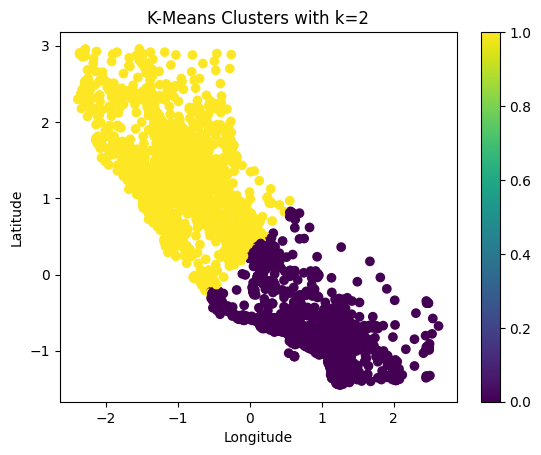

In [9]:
import matplotlib.pyplot as plt

# Visualize clusters
def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Apply KMeans for the optimal number of clusters
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_opt.fit(data_scaled)
plot_clusters(data_scaled, kmeans_opt.labels_, f'K-Means Clusters with k={optimal_k}')


## Cluster Analysis
Examine the characteristics of each cluster and analyze how the clusters differ in terms of median income and location.

In [10]:
housing_data['Cluster'] = kmeans_opt.labels_

# Group by cluster and analyze the median income
cluster_analysis = housing_data.groupby('Cluster')['MedInc'].mean()
print(cluster_analysis)


Cluster
0    3.922444
1    3.799659
Name: MedInc, dtype: float64


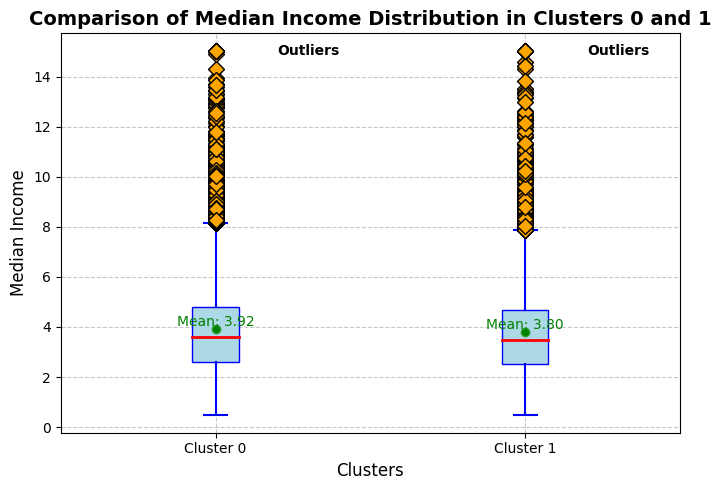

Cluster 0 Income Statistics:
 count    11937.000000
mean         3.922444
std          1.927142
min          0.499900
25%          2.592700
50%          3.588200
75%          4.812500
max         15.000100
Name: MedInc, dtype: float64

Cluster 1 Income Statistics:
 count    8703.000000
mean        3.799659
std         1.859465
min         0.499900
25%         2.531300
50%         3.462000
75%         4.666050
max        15.000100
Name: MedInc, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'housing_data' and 'kmeans_opt' are available from previous steps
housing_data['Cluster'] = kmeans_opt.labels_

# Extract income data for each cluster
cluster_0_income = housing_data[housing_data['Cluster'] == 0]['MedInc']
cluster_1_income = housing_data[housing_data['Cluster'] == 1]['MedInc']

income_data = [cluster_0_income, cluster_1_income]

plt.figure(figsize=(7, 5))

# Create the box plot without altering the default colors of the outliers
boxplot = plt.boxplot(income_data, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue', linewidth=1.5),
                      capprops=dict(color='blue', linewidth=1.5),
                      flierprops=dict(markerfacecolor='orange', marker='D', markersize=8),  # Keep outliers default
                      showmeans=True, meanline=False, meanprops=dict(marker='o', markerfacecolor='green'))

# Add title and labels
plt.title('Comparison of Median Income Distribution in Clusters 0 and 1', fontsize=14, fontweight='bold')
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Median Income', fontsize=12)
plt.xticks([1, 2], ['Cluster 0', 'Cluster 1'], fontsize=10)

# Compute and display the mean values for each cluster
cluster_0_mean = cluster_0_income.mean()
cluster_1_mean = cluster_1_income.mean()

# Add mean values as text on the plot
plt.text(1, cluster_0_mean, f'Mean: {cluster_0_mean:.2f}', ha='center', va='bottom', color='green', fontsize=10)
plt.text(2, cluster_1_mean, f'Mean: {cluster_1_mean:.2f}', ha='center', va='bottom', color='green', fontsize=10)

# Identify outliers for each cluster
for i, cluster_data in enumerate(income_data):
    Q1 = np.percentile(cluster_data, 25)
    Q3 = np.percentile(cluster_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = cluster_data[(cluster_data < lower_bound) | (cluster_data > upper_bound)]

    # If there are outliers, annotate only once to the right of the boxplot for the cluster
    if len(outliers) > 0:
        plt.text(i + 1.2, max(outliers), 'Outliers', ha='left', va='center', color='black', fontsize=10, fontweight='bold')

# Add grid and make it look better
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print statistics for both clusters
cluster_0_stats = cluster_0_income.describe()
cluster_1_stats = cluster_1_income.describe()

print("Cluster 0 Income Statistics:\n", cluster_0_stats)
print("\nCluster 1 Income Statistics:\n", cluster_1_stats)


## Interpreting the Results
Explain how different clusters correspond to specific geographical regions and income levels.
Discuss how clusters represent segments of the housing market and whether there are clear separations based on location and income.
## Optimize the Number of Clusters Using Silhouette Score
Show a plot of the silhouette scores for different values of k.

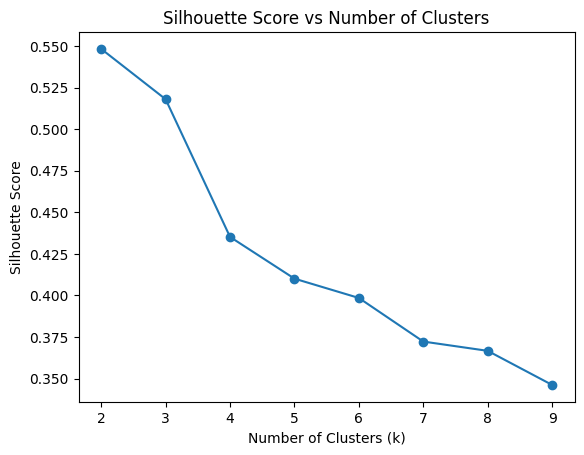

In [5]:
# Plot silhouette scores for different k values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()
